<a href="https://colab.research.google.com/github/pinilDissanayaka/LangGraph-Simple-AI-agent/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.5/245.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [44]:
import os
from google.colab import userdata
from langgraph.graph import StateGraph, END, START
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from typing import  Annotated
from typing_extensions import TypedDict

In [6]:
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

In [7]:
llm=ChatGroq()

In [29]:
class State(TypedDict):
  messages:Annotated[list, add_messages]

In [49]:
graph_flow=StateGraph(State)

In [50]:
def llm_call(state:State):
  question=state["messages"][-1]
  return {"messages":llm.invoke(question.content)}

In [51]:
graph_flow.add_node("llm", llm_call)

graph_flow.add_edge(START, "llm")
graph_flow.add_edge("llm", END)

In [52]:
graph=graph_flow.compile()

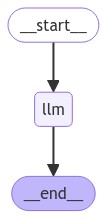

In [53]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    # user_input is already a HumanMessage object, so no need to recreate it
    for event in graph.stream({"messages": user_input}): # Pass only the HumanMessage object
        for value in event.values():
            print("Assistant:", value['messages'].content)

User: hi
Assistant: Hello! Welcome to the AI language model. How can I help you today? If you have any questions, need help with a specific topic, or just want to chat, feel free to ask. I'm here to assist you. 😊
User: how are you
Assistant: I'm just a computer program, so I don't have feelings or emotions like a human does. However, I'm here and ready to assist you with any questions you have to the best of my ability! Is there something you would like to know?
